# **Bloom Analysis - Pheno_Woody_Colored**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

## Open file and load data

In [ ]:
# download the csv file
pheno_woody_colored_leaves = "https://drive.usercontent.google.com/download?id=19PSpoTsXrjib7wuqgYntOntiESziIOXx&export=download&authuser=0&confirm=t&uuid=a721bbef-7e6c-451f-8185-8d6daecad9dc&at=APZUnTXp3u3hoJVq986rO325v7Yj:1715039958282"
original_data = pd.read_csv(pheno_woody_colored_leaves)

In [ ]:
# presere a copy of the original data
df = original_data.copy()
# view the first five entries of the dataset
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY
0,Acer,saccharum,2,Home,ME,2011,294.750000
1,Acer,saccharum,2,Home,ME,2012,290.555556
2,Acer,saccharum,2,Home,ME,2013,282.045455
3,Acer,saccharum,2,Home,ME,2014,279.818182
4,Acer,saccharum,2,Home,ME,2015,290.761905


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genus      4600 non-null   object 
 1   Species    4600 non-null   object 
 2   Site_ID    4600 non-null   int64  
 3   Site_Name  4600 non-null   object 
 4   State      4600 non-null   object 
 5   Year       4600 non-null   int64  
 6   DOY        4600 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 251.7+ KB


## Unique Genera

56 unique genera:
['Acer' 'Amelanchier' 'Betula' 'Forsythia' 'Fraxinus' 'Hamamelis' 'Ilex'
 'Magnolia' 'Prunus' 'Quercus' 'Rhamnus' 'Tilia' 'Juglans' 'Cornus'
 'Fagus' 'Malus' 'Cercis' 'Carya' 'Lindera' 'Liquidambar' 'Liriodendron'
 'Nyssa' 'Sassafras' 'Ulmus' 'Viburnum' 'Populus' 'Toxicodendron' 'Ostrya'
 'Cephalanthus' 'Vaccinium' 'Alnus' 'Symphoricarpos' 'Rhus' 'Corylus'
 'Celtis' 'Aruncus' 'Spiraea' 'Gleditsia' 'Robinia' 'Berberis' 'Lonicera'
 'Aesculus' 'Halesia' 'Poncirus' 'Rosa' 'Ginkgo' 'Platanus' 'Diospyros'
 'Carpinus' 'Oxydendrum' 'Gaylussacia' 'Morella' 'Salix' 'Pyrus' 'Asimina'
 'Sorbus']


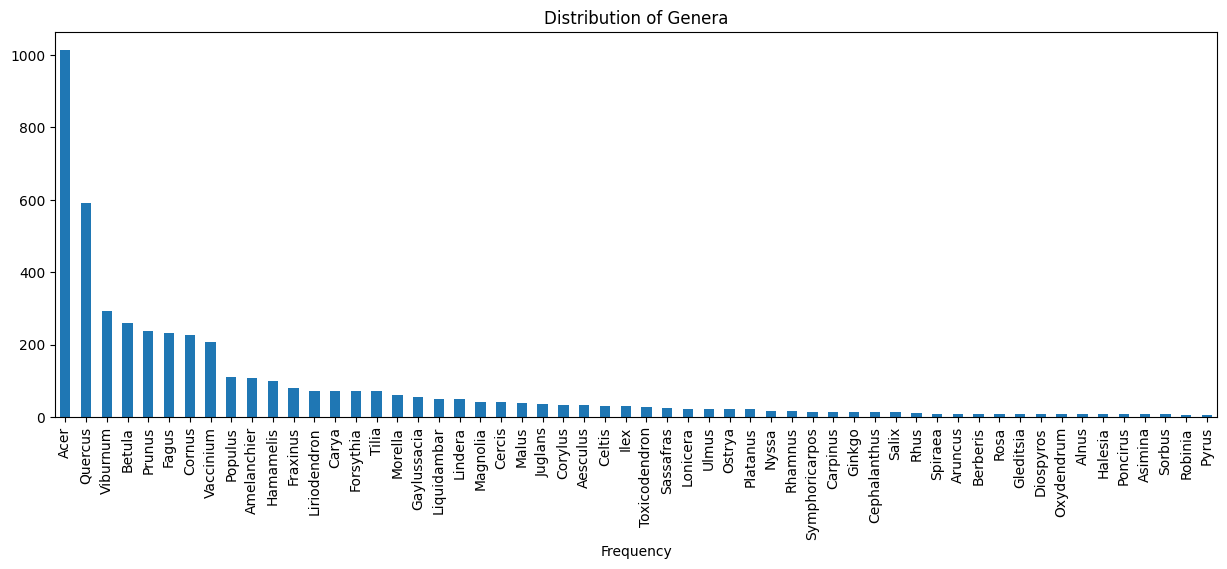

In [ ]:
genus_list = df['Genus'].unique()

plt.figure(figsize = (15,5))
print(len(genus_list), 'unique genera:')
print(genus_list)
df['Genus'].value_counts().plot.bar()
plt.xlabel('Frequency')
plt.title('Distribution of Genera')
plt.show()

## Unique Species

91 unique species:
['saccharum' 'arborea' 'papyrifera' 'spp.' 'americana' 'virginiana'
 'verticillata' 'stellata' 'serotina' 'rubra' 'velutina' 'cathartica'
 'platanoides' 'rubrum' 'canadensis' 'nigra' 'florida-appalachianspring'
 'grandifolia' 'florida' 'pumila' 'macrocarpa' 'lenta' 'glabra' 'benzoin'
 'styraciflua' 'tulipifera' 'sylvatica' 'albidum' 'acerifolium' 'dentatum'
 'prunifolium' 'balsamifera' 'alba' 'radicans' 'negundo' 'alnifolia'
 'tremuloides' 'sericea' 'occidentalis' 'corymbosum' 'incana'
 'alleghaniensis' 'albus' 'lantanoides' 'racemosa' 'saccharinum' 'dioicus'
 'vanhouttei' 'triacanthos' 'deltoides' 'palustris' 'cordiformis'
 'pseudoacacia' 'uliginosum' 'thunbergii' 'maackii' 'alternifolia'
 'morrowii' 'pavia' 'kousa' 'carolina' 'trifoliata' 'rugosa'
 'pensylvanicum' 'spicatum' 'biloba' 'grandiflora-autumnbrilliance'
 'tripetala' 'yedoensis' 'imbricaria' 'caroliniana' 'fraseri' 'arboreum'
 'baccata' 'pensylvanica' 'ilicifolia' 'angustifolium' 'maritima'
 'discolor' 'f

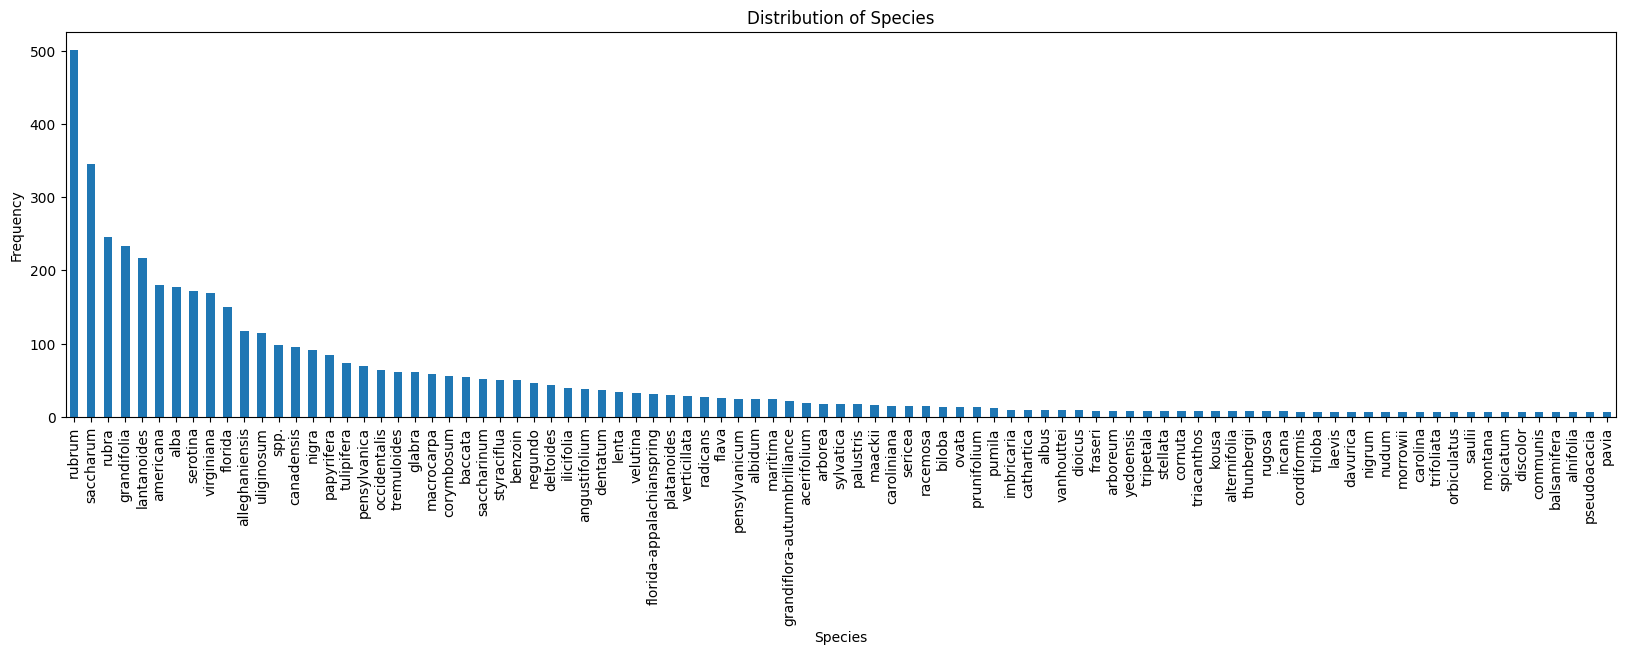

In [ ]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

plt.figure(figsize=(20,5))
df['Species'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Species')
plt.show()

## Sites and States

In [ ]:
state_counts = df['State'].value_counts().reset_index()
print('state_counts: \n',state_counts.sort_values('count', ascending=False).head().to_markdown(),'\n')
state_sites = df.groupby('State')['Site_Name'].nunique().reset_index()
print('state_sites: \n',state_sites.sort_values('Site_Name', ascending = False).head().to_markdown())

state_counts: 
 |    | State   |   count |
|---:|:--------|--------:|
|  0 | NY      |    1553 |
|  1 | MA      |     722 |
|  2 | NH      |     674 |
|  3 | MN      |     601 |
|  4 | ME      |     359 | 

state_sites: 
 |    | State   |   Site_Name |
|---:|:--------|------------:|
| 12 | NH      |          40 |
| 13 | NY      |          33 |
|  6 | MA      |          33 |
| 10 | MN      |          23 |
| 17 | VA      |           9 |


In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_sites['State'],
    z=state_sites['Site_Name'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Sites by State',
    geo_scope='usa'
)

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],
    z=state_counts['count'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title='Count'
))

fig.update_layout(
    title_text='Prevalence of Data Points by State',
    geo_scope='usa'
)

fig.show()

### List of All Sites by State

In [ ]:
# print all site names by state
df.groupby('State')['Site_Name'].value_counts()

State  Site_Name                                            
CT     Burlingham west                                           12
       South of garden terraces                                  11
IA     Savanna Trail                                              7
IL     backyard                                                  28
       03. 606-DRAKE--0.3/2.4-0.5/2.2 MM                          6
       02. 606-LAWNDALE-0.1/2.6-0.3/2.4 MM                        6
       Marist Chicago                                             1
IN     Holliday Park                                             30
       Home                                                       6
       Backyard                                                   6
       my backyard                                                1
KS     UKFS_065.phenology.phe - primary                          18
KY     MSU                                                       12
       University of Louisville                        

# Form groups based on unique combinations of genus, species, location

In [ ]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Genus'][ind],df['Species'][ind], df['Site_Name'][ind], df['State'][ind])
  categories.append(category)
df['categories'] = categories

In [ ]:
# view the new column
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
0,Acer,saccharum,2,Home,ME,2011,294.750000,"(Acer, saccharum, Home, ME)"
1,Acer,saccharum,2,Home,ME,2012,290.555556,"(Acer, saccharum, Home, ME)"
2,Acer,saccharum,2,Home,ME,2013,282.045455,"(Acer, saccharum, Home, ME)"
3,Acer,saccharum,2,Home,ME,2014,279.818182,"(Acer, saccharum, Home, ME)"
4,Acer,saccharum,2,Home,ME,2015,290.761905,"(Acer, saccharum, Home, ME)"


In [ ]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique cominations of genus, species, and site in the data')

There are 555 unique cominations of genus, species, and site in the data


## Map each group to the subset of data that it consists of

In [ ]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:


  criteria1 = df['Genus'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Site_Name'] == category[2]
  criteria4 = df['State'] == category[3]


  categorized_data.update({category:df[criteria1 & criteria2 & criteria3 & criteria4]})



## Visualize an Example

In [ ]:
# enter search criteria
genus = 'Acer'
species = 'platanoides'
site = 'Ecology Phenology Project'
state = 'MA'

# view data associated with a given category group
example_data = categorized_data.get((genus, species, site, state))
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,DOY,categories
3615,Acer,platanoides,20120,Ecology Phenology Project,MA,2015,300.244898,"(Acer, platanoides, Ecology Phenology Project,..."
3616,Acer,platanoides,20120,Ecology Phenology Project,MA,2016,303.667785,"(Acer, platanoides, Ecology Phenology Project,..."
3617,Acer,platanoides,20120,Ecology Phenology Project,MA,2017,294.878378,"(Acer, platanoides, Ecology Phenology Project,..."
3618,Acer,platanoides,20120,Ecology Phenology Project,MA,2018,292.102564,"(Acer, platanoides, Ecology Phenology Project,..."
3619,Acer,platanoides,20120,Ecology Phenology Project,MA,2022,100.625000,"(Acer, platanoides, Ecology Phenology Project,..."
3620,Acer,platanoides,20120,Ecology Phenology Project,MA,2023,112.500000,"(Acer, platanoides, Ecology Phenology Project,..."


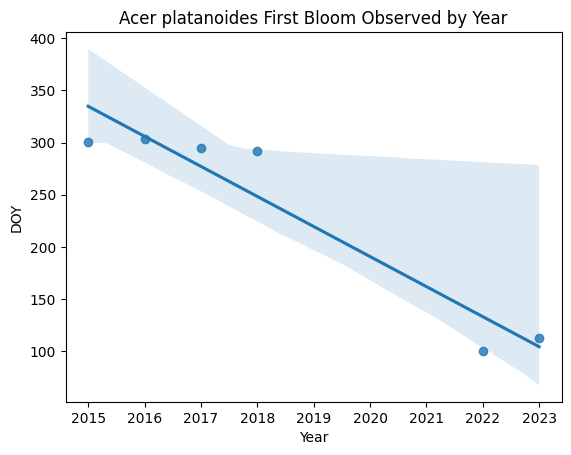

In [ ]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])
plt.title(f'{genus} {species} First Bloom Observed by Year')
plt.show()

## Calculate Pearson correlation coefficient

In [ ]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

-0.9523

# Perform regression and calculate relevant stats for all 555 unique groups

In [ ]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique catgory groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'dataset' : 'pheno_woody',
    'event' : 'colored leaves',
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [ ]:
# drop all rows containing NaN values (these result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view and save the dataframe
correlation_df.to_csv('/content/drive/MyDrive/Projects/Bloom Project/stats/woody_colored_stats.csv', index=False) #running this line requires that you mount your drive!
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

         dataset           event                                                                              grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
0    pheno_woody  colored leaves                                                           (Acer, saccharum, Home, ME)            13    -0.6144    -0.4103  -1.6268  0.3775   0.0171
1    pheno_woody  colored leaves                                                      (Amelanchier, arborea, Home, ME)            12    -0.7262    -0.4848  -2.3747  0.5274   0.0056
2    pheno_woody  colored leaves                                                        (Betula, papyrifera, Home, ME)            13    -0.7368    -0.6154  -2.6714  0.5429   0.0029
3    pheno_woody  colored leaves                                                           (Forsythia, spp., Home, ME)            12     0.1924     0.1818   0.9454  0.0370   0.6113
4    pheno_woody  colored leaves                                                       (Fraxinu

In [ ]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,545.0,8.418349,1.905206,3.0000,7.0000,8.0000,10.0000,13.0000
Pearson r,545.0,-0.056992,0.431117,-0.9523,-0.3920,-0.0466,0.2587,0.8943
Kendall τ,545.0,-0.043616,0.321116,-0.9048,-0.2381,-0.0556,0.1556,0.7857
R²,545.0,0.188767,0.206259,0.0000,0.0225,0.1036,0.2929,0.9069
p-value,545.0,0.442074,0.304072,0.0015,0.1660,0.4078,0.7134,0.9995


### Restict observations to instances that saw a p-value < .05
#### Sorted by p-value


In [ ]:
significant = correlation_df[correlation_df['p-value']<.05].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

         dataset           event                                                            grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
7    pheno_woody  colored leaves                                      (Magnolia, stellata, Home, ME)             8    -0.9106    -0.8571  -5.1171  0.8292   0.0015
2    pheno_woody  colored leaves                                      (Betula, papyrifera, Home, ME)            13    -0.7368    -0.6154  -2.6714  0.5429   0.0029
422  pheno_woody  colored leaves                                  (Carya, glabra, Hickory Route, MA)             8    -0.8825    -0.7857  -4.3426  0.7789   0.0032
407  pheno_woody  colored leaves                  (Acer, platanoides, Ecology Phenology Project, MA)             6    -0.9523    -0.7333 -28.7843  0.9069   0.0033
339  pheno_woody  colored leaves               (Fraxinus, americana, Huyck Preserve Falls Trail, NY)             8     0.8943     0.7143   2.6259  0.7997   0.0035
24   pheno_woody  colo

### Descriptive Statistics of Instance with p-value < .05:

In [ ]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,54.0,8.759259,2.145071,6.0000,7.000000,8.0000,9.750000,13.0000
Pearson r,54.0,-0.401843,0.671772,-0.9523,-0.810800,-0.7358,-0.597750,0.8943
Kendall τ,54.0,-0.308235,0.538978,-0.9048,-0.642900,-0.5000,-0.336350,0.7857
R²,54.0,0.604383,0.133812,0.3507,0.510200,0.5851,0.680150,0.9069
p-value,54.0,0.021037,0.014320,0.0015,0.007625,0.0202,0.031175,0.0498


###Significant Instances with Positive Slope:

In [ ]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.sort_values('slope', ascending = False).to_string())

         dataset           event                                                            grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
133  pheno_woody  colored leaves                                    (Acer, rubrum, my back yard, ME)            13     0.6686     0.4516  7.3377  0.4470   0.0137
414  pheno_woody  colored leaves                            (Acer, saccharum, Peters Hill Route, MA)             8     0.7603     0.7143  5.9138  0.5780   0.0312
384  pheno_woody  colored leaves                                 (Morella, pensylvanica, Site A, MA)             8     0.7960     0.5714  4.3957  0.6336   0.0207
392  pheno_woody  colored leaves                                 (Morella, pensylvanica, Site C, MA)             8     0.7304     0.5714    4.32  0.5334   0.0445
167  pheno_woody  colored leaves                               (Cornus, florida, Michigan house, MI)            10     0.7776     0.6000  3.3928  0.6046   0.0099
431  pheno_woody  colored le

### Descriptive Statistics of Positively Sloped Instances:

In [ ]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,13.0,9.538462,2.331501,7.0000,8.0000,8.0000,12.0000,13.0000
Pearson r,13.0,0.770277,0.074287,0.6449,0.7304,0.7656,0.8121,0.8943
Kendall τ,13.0,0.605000,0.098107,0.4516,0.5641,0.5714,0.7143,0.7857
R²,13.0,0.598392,0.114566,0.4160,0.5334,0.5861,0.6594,0.7997
p-value,13.0,0.019615,0.012279,0.0035,0.0099,0.0173,0.0280,0.0445


### Significant Instances with Negative Slope:

In [ ]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.sort_values('slope').to_string())

         dataset           event                                                    grouping  observations  Pearson r  Kendall τ    slope      R²  p-value
407  pheno_woody  colored leaves          (Acer, platanoides, Ecology Phenology Project, MA)             6    -0.9523    -0.7333 -28.7843  0.9069   0.0033
411  pheno_woody  colored leaves             (Quercus, rubra, Ecology Phenology Project, MA)             7    -0.7609    -0.3333 -20.7002  0.5789   0.0461
24   pheno_woody  colored leaves                        (Malus, pumila, my NE side yard, MA)            12    -0.7634    -0.4545 -10.1644  0.5827   0.0036
511  pheno_woody  colored leaves                          (Viburnum, nudum, Shrub Route, MA)             7    -0.8075    -0.5238  -9.2189  0.6521   0.0266
25   pheno_woody  colored leaves                       (Quercus, rubra, my NE side yard, MA)            11    -0.6420    -0.3455  -8.7527  0.4121   0.0311
183  pheno_woody  colored leaves                 (Toxicodendron, radic

### Descriptive Statistics of Negatively Sloped Instances:

In [ ]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,41.0,8.512195,2.050877,6.0000,7.0000,8.0000,9.0000,13.0000
Pearson r,41.0,-0.773490,0.090588,-0.9523,-0.8267,-0.7643,-0.7122,-0.5922
Kendall τ,41.0,-0.597798,0.158207,-0.9048,-0.7222,-0.6000,-0.4545,-0.3333
R²,41.0,0.606283,0.140613,0.3507,0.5073,0.5841,0.6834,0.9069
p-value,41.0,0.021488,0.015020,0.0015,0.0061,0.0202,0.0335,0.0498


### Positive/Negative Slope Count

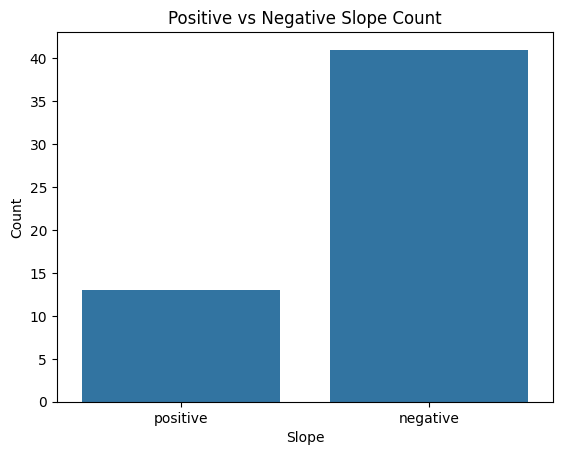

Number of positive slope examples: 13
Number of negative slope examples: 41


In [ ]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 54, out of the original 555, groupings showed a statistically significant (p < .05) relationship between year and DOY
##13 have a positive slope
##41 have a negative slope